In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt


In [4]:
words = open('name.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [5]:
len(words)

200

In [12]:
chars = sorted(list(set(''.join(words))))
chars

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [21]:
stoi = {s: i+1 for i,s in enumerate(chars)}
print(stoi)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}


In [22]:
stoi['.']=0
print(stoi)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}


In [24]:
itos = {i: s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [44]:
block_size = 3
X,Y = [], []
for w in words:
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        #print(ch ,"=", ix)
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix]
print(X)
print("-----------------------------------------------------------------------------------------")
print(Y)
print("-----------------------------------------------------------------------------")
print(context)
X = torch.tensor(X)
Y = torch.tensor(Y)

[[0, 0, 0], [0, 0, 5], [0, 5, 13], [5, 13, 13], [13, 13, 1], [0, 0, 0], [0, 0, 15], [0, 15, 12], [15, 12, 9], [12, 9, 22], [9, 22, 9], [22, 9, 1], [0, 0, 0], [0, 0, 1], [0, 1, 22], [1, 22, 1], [0, 0, 0], [0, 0, 9], [0, 9, 19], [9, 19, 1], [19, 1, 2], [1, 2, 5], [2, 5, 12], [5, 12, 12], [12, 12, 1], [0, 0, 0], [0, 0, 19], [0, 19, 15], [19, 15, 16], [15, 16, 8], [16, 8, 9], [8, 9, 1], [0, 0, 0], [0, 0, 3], [0, 3, 8], [3, 8, 1], [8, 1, 18], [1, 18, 12], [18, 12, 15], [12, 15, 20], [15, 20, 20], [20, 20, 5], [0, 0, 0], [0, 0, 13], [0, 13, 9], [13, 9, 1], [0, 0, 0], [0, 0, 1], [0, 1, 13], [1, 13, 5], [13, 5, 12], [5, 12, 9], [12, 9, 1], [0, 0, 0], [0, 0, 8], [0, 8, 1], [8, 1, 18], [1, 18, 16], [18, 16, 5], [16, 5, 18], [0, 0, 0], [0, 0, 5], [0, 5, 22], [5, 22, 5], [22, 5, 12], [5, 12, 25], [12, 25, 14], [0, 0, 0], [0, 0, 1], [0, 1, 2], [1, 2, 9], [2, 9, 7], [9, 7, 1], [7, 1, 9], [1, 9, 12], [0, 0, 0], [0, 0, 5], [0, 5, 13], [5, 13, 9], [13, 9, 12], [9, 12, 25], [0, 0, 0], [0, 0, 5], [0, 5, 

In [37]:
print(X)

print("-----------------------------------")

print(Y)

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        ...,
        [ 1, 12,  1],
        [12,  1, 14],
        [ 1, 14,  1]])
-----------------------------------
tensor([ 5, 13, 13,  ..., 14,  1,  0])


In [45]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([1390, 3]), torch.int64, torch.Size([1390]), torch.int64)

In [58]:
block_size = 3

def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y


In [59]:
import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

In [60]:
n1
print(n1)
n2
print(n2)

160
180


In [63]:
Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([1115, 3]) torch.Size([1115])
torch.Size([130, 3]) torch.Size([130])
torch.Size([145, 3]) torch.Size([145])


In [65]:
C = torch.randn((27,2))
C

tensor([[ 0.8839,  1.4006],
        [ 0.1298,  1.4144],
        [ 2.4650,  0.8454],
        [-0.0649,  1.8685],
        [-1.1829, -0.7061],
        [-0.2437, -0.6269],
        [ 0.0671,  1.0638],
        [-0.7095,  0.3744],
        [ 1.9160,  2.1141],
        [-0.7862,  0.3260],
        [ 0.1304, -3.2046],
        [-0.1248,  1.6373],
        [ 0.4650,  0.6813],
        [-0.8048, -0.0433],
        [ 1.1281, -0.0888],
        [-1.1654, -0.2982],
        [ 0.1112, -0.8790],
        [ 0.0315,  0.6884],
        [ 0.7520, -1.0166],
        [-0.1245,  1.2252],
        [ 1.7043, -0.8970],
        [ 0.1713, -0.6829],
        [-1.5619,  1.3842],
        [ 0.7581, -0.8422],
        [ 0.9834,  0.5619],
        [ 1.0560,  0.4285],
        [ 0.8356, -1.0819]])

In [67]:
emb = C[X]
print(emb)
emb.shape

tensor([[[ 0.8839,  1.4006],
         [ 0.8839,  1.4006],
         [ 0.8839,  1.4006]],

        [[ 0.8839,  1.4006],
         [ 0.8839,  1.4006],
         [-0.2437, -0.6269]],

        [[ 0.8839,  1.4006],
         [-0.2437, -0.6269],
         [-0.8048, -0.0433]],

        ...,

        [[ 0.1298,  1.4144],
         [ 0.4650,  0.6813],
         [ 0.1298,  1.4144]],

        [[ 0.4650,  0.6813],
         [ 0.1298,  1.4144],
         [ 1.1281, -0.0888]],

        [[ 0.1298,  1.4144],
         [ 1.1281, -0.0888],
         [ 0.1298,  1.4144]]])


torch.Size([1390, 3, 2])

In [73]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)
print(w1)

print("--------------------------------------------------")
print(b1)

tensor([[-6.5425e-03, -2.9467e-01, -1.5903e+00, -1.4471e+00,  6.2269e-01,
          7.9530e-01,  1.7654e+00,  5.6543e-02,  1.1455e+00, -2.0252e+00,
         -2.1348e+00,  8.3659e-01,  5.7760e-01,  5.1208e-01,  2.1460e+00,
          6.0115e-03,  1.3571e+00,  2.0525e-01, -1.0563e+00,  6.6101e-01,
          6.7089e-01, -6.3604e-01,  1.5384e-01,  1.4813e+00,  1.8586e+00,
         -1.5013e-01, -1.4821e+00, -3.3922e-01,  8.0096e-01, -3.6669e-02,
         -1.2028e+00,  1.3521e+00, -8.9062e-01, -9.1071e-01, -3.4977e-01,
         -1.0179e+00,  2.3633e-01, -8.2712e-01, -7.1368e-01, -8.8001e-03,
         -7.6275e-01,  1.0038e+00, -8.7811e-01,  7.5636e-02, -6.8433e-01,
         -5.3832e-01, -1.6674e+00,  1.6317e-01,  1.5877e+00, -1.5158e+00,
         -1.4590e+00,  8.4268e-01,  4.1288e-01,  4.1966e-01, -8.8611e-01,
          5.7860e-01, -1.1052e+00, -9.0177e-02, -3.9592e-01, -9.5622e-01,
         -1.4688e+00, -8.9627e-02, -5.7448e-01, -8.1523e-01, -1.0433e+00,
          8.0917e-01, -4.5659e-01,  2.

In [74]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
h

tensor([[-0.9844, -0.6672,  0.7423,  ..., -0.5507, -0.9992, -0.9426],
        [ 0.4651,  0.9944, -0.8474,  ..., -0.3141, -0.9922,  0.9922],
        [-0.6213,  0.9540,  0.5790,  ...,  0.7451,  0.1306,  0.9997],
        ...,
        [-0.9933,  0.0108,  0.9650,  ...,  0.4376, -0.9959,  0.5243],
        [ 0.8629, -0.9403, -0.8428,  ..., -0.7408, -0.9198,  0.4047],
        [-0.9926,  0.5236,  0.8680,  ...,  0.4047, -0.9979,  0.3860]])

In [75]:
h.shape

torch.Size([1390, 100])

In [77]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)
print(W2)

tensor([[-0.7275,  0.5839,  0.0055,  ..., -1.1308,  1.2378, -0.3986],
        [-0.3119, -0.0924,  1.6055,  ...,  0.8030,  1.8490, -0.4744],
        [ 0.7690, -1.7061, -0.2139,  ..., -0.5626,  0.1838, -0.6830],
        ...,
        [-0.3812,  0.3401,  0.1567,  ...,  1.6721,  0.8972,  1.2803],
        [ 1.1509, -1.1044,  1.0987,  ..., -1.1125,  0.7304,  0.7376],
        [-2.3404,  2.4638,  0.2883,  ..., -0.0723, -2.0232, -0.0224]])


In [78]:
print(b2)

tensor([ 1.9149, -0.3427, -0.5328, -0.5491, -0.0286,  0.1154,  1.0415, -1.2248,
         0.0443, -1.9734,  0.0659,  0.3367, -1.8673, -0.6155, -0.0569,  0.3526,
         2.1467,  1.2350, -0.6613, -0.2209,  0.0521, -1.8465,  0.3931, -0.9842,
         0.3939, -1.0044, -0.5896])


In [79]:
logits = h @ W2 + b2

In [80]:
logits.shape

torch.Size([1390, 27])

In [82]:
counts = logits.exp()
counts

tensor([[4.9093e+02, 7.6096e-03, 2.3386e-03,  ..., 1.8164e+01, 3.4026e+02,
         2.1229e-07],
        [1.4523e-02, 3.3143e+06, 2.1564e+00,  ..., 6.0745e-01, 4.7873e-01,
         1.5861e-04],
        [2.5561e-02, 2.5014e+01, 2.6189e-02,  ..., 2.4245e+00, 2.0439e-06,
         3.3292e-02],
        ...,
        [1.5332e+02, 1.0151e-04, 4.3889e-03,  ..., 1.3669e+03, 2.0012e+02,
         4.8337e-07],
        [7.8166e+00, 2.5821e+02, 4.6045e-05,  ..., 5.3130e+00, 1.0393e-02,
         1.1736e-04],
        [2.7770e+01, 2.9295e-05, 1.6472e-02,  ..., 1.8740e+02, 1.0664e+02,
         8.9439e-03]])

In [83]:
prob = counts / counts.sum(1, keepdims=True)
prob

tensor([[2.3533e-08, 3.6477e-13, 1.1210e-13,  ..., 8.7070e-10, 1.6311e-08,
         1.0176e-17],
        [2.6177e-09, 5.9740e-01, 3.8868e-07,  ..., 1.0949e-07, 8.6290e-08,
         2.8589e-11],
        [1.3312e-08, 1.3027e-05, 1.3639e-08,  ..., 1.2627e-06, 1.0645e-12,
         1.7338e-08],
        ...,
        [2.4018e-06, 1.5901e-12, 6.8754e-11,  ..., 2.1413e-05, 3.1350e-06,
         7.5721e-15],
        [2.8883e-07, 9.5410e-06, 1.7014e-12,  ..., 1.9632e-07, 3.8403e-10,
         4.3364e-12],
        [1.1944e-07, 1.2599e-13, 7.0845e-11,  ..., 8.0599e-07, 4.5866e-07,
         3.8466e-11]])

In [84]:
prob.shape

torch.Size([1390, 27])

In [93]:
batch_size = 32
batch_start = 0
batch_end = batch_start + batch_size

Y_batch = Y[batch_start:batch_end]  # Correct indexing to select the batch of labels
loss = -prob[torch.arange(batch_size), Y_batch].log().mean()

In [94]:
loss

tensor(16.6894)

In [95]:
Xtr.shape, Ytr.shape

(torch.Size([1115, 3]), torch.Size([1115]))

In [99]:
g = torch.Generator().manual_seed(2147483647)
print(g)
print("---------")
C = torch.randn((27, 10), generator=g)
print(C)
print("---------------")
W1 = torch.randn((30, 200), generator=g)
print(W1)
print("----------")
b1 = torch.randn(200, generator=g)
print(b1)
print("-------------------------")
W2 = torch.randn((200, 27), generator=g)
print(W2)
print("----------------------------")
b2 = torch.randn(27, generator=g)
print(b2)
print("--------------------------------------------")
parameters = [C, W1, b1, W2, b2]
print(parameters)
print("----------------------------------------")

---------
tensor([[ 1.5674e+00, -2.3729e-01, -2.7385e-02, -1.1008e+00,  2.8588e-01,
         -2.9644e-02, -1.5471e+00,  6.0489e-01,  7.9136e-02,  9.0462e-01],
        [-4.7125e-01,  7.8682e-01, -3.2844e-01, -4.3297e-01,  1.3729e+00,
          2.9334e+00,  1.5618e+00, -1.6261e+00,  6.7716e-01, -8.4040e-01],
        [ 9.8488e-01, -1.4837e-01, -1.4795e+00,  4.4830e-01, -7.0731e-02,
          2.4968e+00,  2.4448e+00, -6.7006e-01, -1.2199e+00,  3.0314e-01],
        [-1.0725e+00,  7.2762e-01,  5.1114e-02,  1.3095e+00, -8.0220e-01,
         -8.5042e-01, -1.8068e+00,  1.2523e+00, -1.2256e+00,  1.2165e+00],
        [-9.6478e-01, -2.3211e-01, -3.4762e-01,  3.3244e-01, -1.3263e+00,
          1.1224e+00,  5.9641e-01,  4.5846e-01,  5.4011e-02, -1.7400e+00],
        [ 1.1560e-01,  8.0319e-01,  5.4108e-01, -1.1646e+00,  1.4756e-01,
         -1.0006e+00,  3.8012e-01,  4.7328e-01, -9.1027e-01, -7.8305e-01],
        [ 1.3506e-01, -2.1161e-01, -1.0406e+00, -1.5367e+00,  9.3743e-01,
         -8.8303e-01, 

In [100]:
sum(p.nelement() for p in parameters)

11897

In [104]:
for p in parameters:
    p.requires_grad = True

In [107]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
print(lrs)

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [108]:
lri = []
lossi = []
stepi = []

In [114]:
for i in range(200000):
  
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())
  
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # update
  #lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

#print(loss.item())

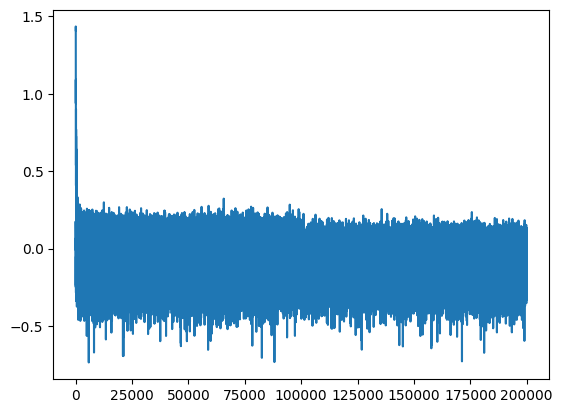

In [115]:
plt.plot(stepi, lossi)

In [116]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 30)@ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(0.8517, grad_fn=<NllLossBackward0>)

In [118]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(8.1794, grad_fn=<NllLossBackward0>)

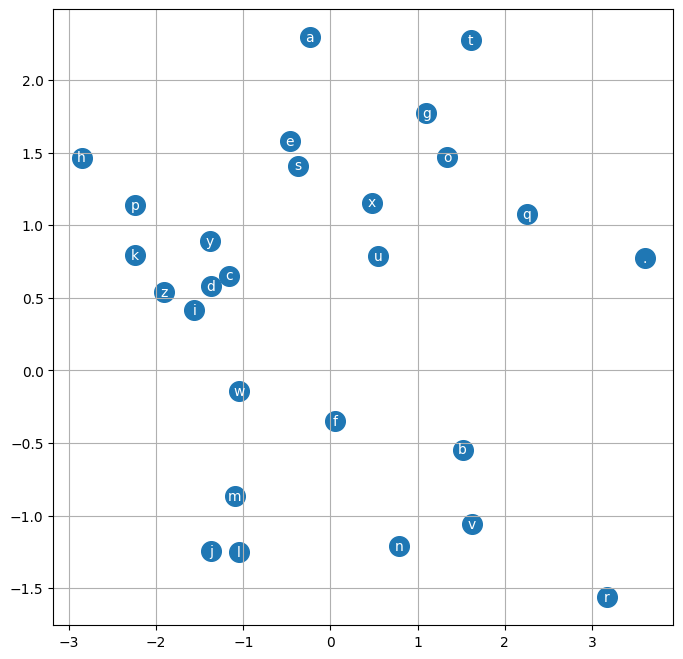

In [121]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center",va="center", color="white")
plt.grid('minor')

In [122]:
context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 3, 10])

In [123]:
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

eden.
gracie.
elle.
dani.
london.
scarlotte.
adalyn.
elilly.
peneloise.
sofia.
ara.
peyton.
kayla.
sadie.
gracie.
stellie.
elle.
andra.
audreagan.
rylee.
